In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def bandit10hist(nsim=2000,tam =1000, vareps=0.05,q0=0):
    Reward = np.zeros((nsim,tam))
    for n in range(nsim):
        A = np.zeros((10,tam)) # % Action register
        R = np.zeros((10,tam)) # % Reward register
        Q = q0*np.ones((10,tam)) # % Value register
        a = np.random.normal(0, 1, 10)
        # Inital
        f = random.randint(0,9)
        A[f,0] = 1
        R[f,0] = np.random.normal(a[f], 1, 1)
        
        # After Inital
        for t in range(1,1000):
            #Determine Action Value estimate using sample average method
            for i in range(10):
                if A[i,t-1] == 1:
                    Q[i,t] = np.sum(R[i,0:t])/np.sum(A[i,0:t])
                else:
                    Q[i,t] = Q[i,t-1]
                    
            M = max(Q[:,t])
            a_s = []
            auxv = random.random()
            if auxv<1-vareps:
                for i in range(10):
                    if Q[i,t] == M:
                        a_s.append(i)
                        
                if len(a_s) > 1:  # Multiple greedy actions
                    r = random.randint(0,len(a_s)-1)
                    k = a_s[r]
                else:   # A greedy action
                    k = a_s[0]
            else:
                k = random.randint(0,9)
            
            A[k,t] = 1      # Action Register 
            R[k,t] = np.random.normal(a[k], 1, 1)   #Reward register
            Reward[n,:] = [sum([row[i] for row in R]) for i in range(0,len(R[0]))]
            
    return Reward

In [ ]:
def bandit10(nsim=2000,tam =1000, vareps=0.05,q0=0):
    reward = np.zeros((nsim,tam))
    potimo =  np.zeros((nsim,tam))
    
    for n in range(nsim):
        Q = q0*np.ones((10,))# % Value register
        a = np.random.normal(0, 1, 10)
        C = np.ones((10,))
        
        cnt = 0
        xx = np.argmax(a)
        
        # f = random.randint(0,9)
        # Q[f] = np.random.normal(a[f], 1, 1)
        # # After Inital
        for t in range(0,1000):
            #Determine Action Value estimate using sample average method
                    
            M = max(Q)
            a_s = []
            auxv = random.random()
            if auxv<1-vareps:
                for i in range(10):
                    if Q[i] == M:
                        a_s.append(i)
                        
                if len(a_s) > 1:  # Multiple greedy actions
                    r = random.randint(0,len(a_s)-1)
                    k = a_s[r]
                else:   # A greedy action
                    k = a_s[0]
            else:
                k = random.randint(0,9)
            
            if xx == k:
                cnt = cnt+1

            
            C[k]=C[k]+1
            R = np.random.normal(a[k], 1, 1)
            Q[k] = Q[k]+(1/C[k])*(R-Q[k])   #Reward register
            reward[n,t] = R
            potimo[n,t] = cnt/(t+1)
    return reward, potimo

In [ ]:
def bandit10ubc(nsim=2000,tam =1000, vareps=0.05,q0=0,c = 2):
    reward = np.zeros((nsim,tam))
    potimo =  np.zeros((nsim,tam))
    
    for n in range(nsim):
        Q = q0*np.ones((10,))# % Value register
        a = np.random.normal(0, 1, 10)
        C = np.ones((10,))
        
        cnt = 0
        xx = np.argmax(a)
        
        for t in range(0,1000):
            #Determine Action Value estimate using sample average method

            Qaux = []       
            for i in range(10):
                Qaux.append(Q[i]+c*np.sqrt(np.log(t+1)/C[i])) 
            
            M = max(Qaux)
            a_s = []
            auxv = random.random()
            if auxv<1-vareps:
                for i in range(10):
                    if Qaux[i] == M:
                        a_s.append(i)
                        
                if len(a_s) > 1:  # Multiple greedy actions
                    r = random.randint(0,len(a_s)-1)
                    k = a_s[r]
                else:   # A greedy action
                    k = a_s[0]
            else:
                k = random.randint(0,9)
            
            if xx == k:
                cnt = cnt+1

            
            C[k]=C[k]+1
            R = np.random.normal(a[k], 1, 1)
            Q[k] = Q[k]+(1/C[k])*(R-Q[k])   #Reward register
            reward[n,t] = R
            potimo[n,t] = cnt/(t+1)
    return reward, potimo

In [11]:
def bandit10grad(nsim=1000,tam =1000, vareps=0.0,q0 = 0,alpha = 0.1):
    reward = np.zeros((nsim,tam))
    potimo =  np.zeros((nsim,tam))
    
    for n in range(nsim):
        Q = q0*np.ones((10,))# % Value register
        a = np.random.normal(0, 1, 10)
        C = np.ones((10,))
        H = np.zeros((10,))
        
        cnt = 0
        xx = np.argmax(a)
        
        for t in range(0,1000):
            #Determine Action Value estimate using sample average method

            pit = np.exp(H)/sum(np.exp(H))

            cpit = np.cumsum(pit)
            auxv = random.random()
            if auxv<1-vareps:
                sela = random.random()
                k = np.sum(cpit<sela)
            else:
                k = random.randint(0,9)
            
            if xx == k:
                cnt = cnt+1

            
            C[k]=C[k]+1
            R = np.random.normal(a[k], 1, 1)
            for i in range(10):
                if i==k:
                    H[i] = H[i]+alpha*(R-Q[i])*(1-pit[i])
                else:
                    H[i] = H[i]-alpha*(R-Q[i])*pit[i]

            Q[k] = Q[k]+(1/C[k])*(R-Q[k])   #Reward register
            reward[n,t] = R
            potimo[n,t] = cnt/(t+1)
    return reward, potimo

In [12]:
rw1,potm1 = bandit10grad()
rw2,potm2 = bandit10grad(alpha = 0.4)

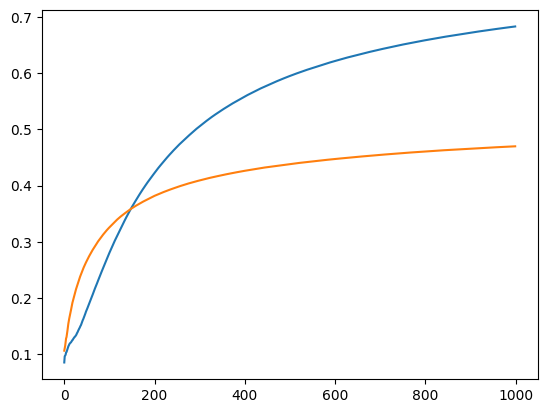

In [13]:
plt.plot(np.mean(potm1,axis=0), label = "q0=0,alpha= 0.1" )
plt.plot(np.mean(potm2,axis=0), label = "q0=0,alpha=0.4" )

In [ ]:
rw1,potm1 = bandit10()
rw2,potm2 = bandit10(q0=5,vareps=0)
rw3,potm3 = bandit10(q0=5,vareps=0.05)
rw4,potm4 = bandit10(q0=10,vareps=0)

In [ ]:
rw1,potm1 = bandit10ubc()
rw2,potm2 = bandit10ubc(q0=0,vareps=0,c=0)
rw3,potm3 = bandit10ubc(q0=0,vareps=0.1,c=0)
rw4,potm4 = bandit10ubc(q0=5,vareps=0,c=2)

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.subplots(1,2)

ax[1].plot(np.mean(potm1,axis=0), label = "q0=0, vareps=0.05,c=2" )
ax[1].plot(np.mean(potm2,axis=0),label = "q0=0,vareps=0,c=0" )
ax[1].plot(np.mean(potm3,axis=0),label = "q0=0,vareps=0.1,c=0" )
ax[1].plot(np.mean(potm4,axis=0),label = "q0=5,vareps=0,c=2" )

ax[0].plot(np.mean(rw1,axis=0))
ax[0].plot(np.mean(rw2,axis=0))
ax[0].plot(np.mean(rw3,axis=0))
ax[0].plot(np.mean(rw4,axis=0))

ax[0].set(xlabel = "iteracoes",ylabel = "recompensa media")
ax[1].set(xlabel = "iteracoes",ylabel = "% ação ótima")

handles, labels = ax[1].get_legend_handles_labels()
ax[0].legend(handles, labels)
ax[1].legend(handles, labels)

In [ ]:
H = np.zeros((10,))
np.exp(H)/sum(np.exp(H))
xx = np.cumsum(np.exp(H)/sum(np.exp(H)))
sela = random.random()
sela

In [ ]:
np.sum(xx<sela)